In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("building_inventory.csv", na_values={
                 'Year Acquired': 0, 'Year Constructed': 0, 'Square Footage': 0})

# Using matplotlib, construct a visualization of the Illinois Building Inventory that communicates the following information:

# Relationship between the year acquired and the year constructed
# Total square footage as a function of congressional district
# Average square footage per floor as a function of congressional district
# Square footage for the five most common departments as a function of year

# Each component will be worth 5 points and must be a completely communicative visualization --
# including labels and a one paragraph writeup of successes and shortcomings in your approach.
# Submit a notebook to Moodle. All source code must be in these files.


/var/folders/zq/gn09x0d53r74hd7z0lp249cr0000gp/T/ipykernel_51034/3562784125.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


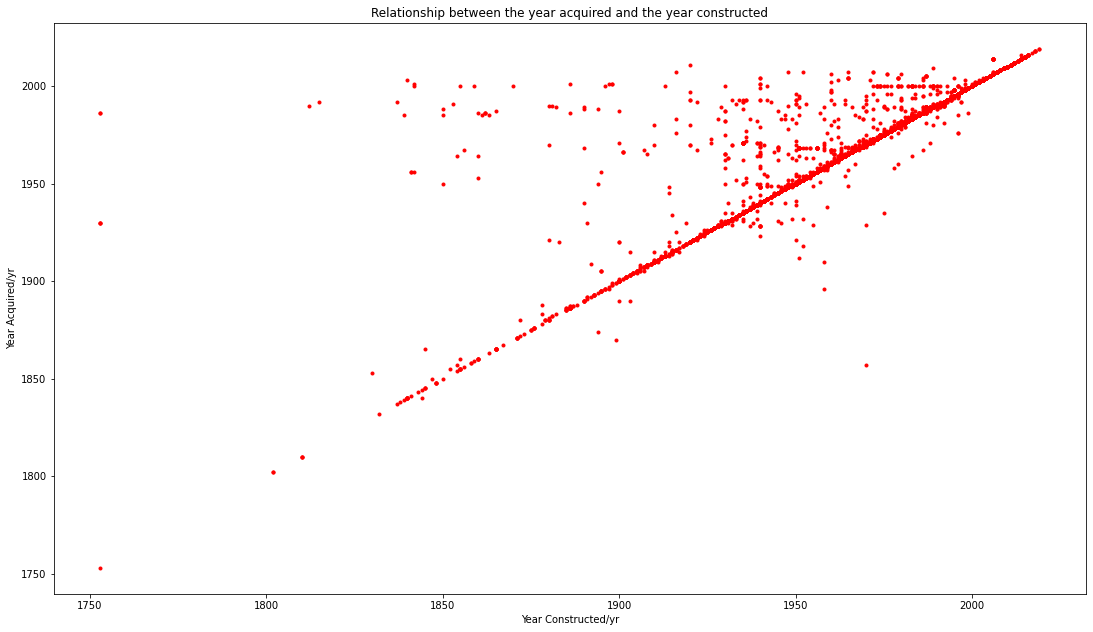

In [2]:

# Relationship between the year acquired and the year constructed



def year_acquired_with_year_constructed(df):
    fig, ax = plt.subplots(1)
    fig.set_size_inches(18.5, 10.5, forward=True)
    ax.scatter(df['Year Constructed'], df['Year Acquired'], marker='.', c='r')
    ax.set_xlabel('Year Constructed/yr')
    ax.set_ylabel('Year Acquired/yr')
    ax.set_title(
        'Relationship between the year acquired and the year constructed')
    fig.show()


year_acquired_with_year_constructed(df)



## First Plot

This is a plot of the first query: the relationship between the year constructed and the year acquired. I used scattered plot to communicate show where are these data points grouped together. The good things about this plot is it can clearly show this grouped diagnal line across this graph. This line is where data has the same value for x and y, which means this entry (building) is comstructed and acquired in the same year. However, some bad parts about this graph is there are too many dots in a graph. Therefore, it is hard to distinguish a dot from other dots. For example, at the place where all data are clustered together, it is hard to tell how many actual data are there.


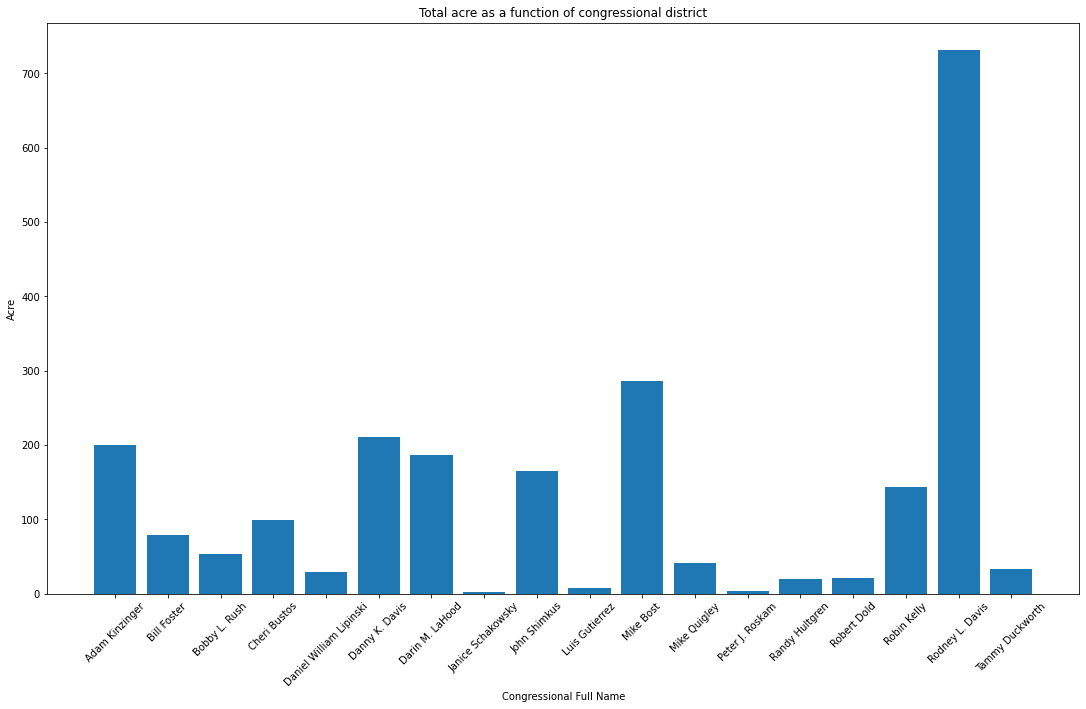

In [3]:

# Total square footage as a function of congressional district



def total_square_footage_with_congressional_district(df):
    cong_foot = df[['Congressional Full Name', 'Square Footage']
                   ].groupby('Congressional Full Name').sum()
    cong_foot['Square Footage'] = cong_foot['Square Footage'] / 43560
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5, forward=True)
    ax.bar(x=cong_foot.index, height=cong_foot['Square Footage'])
    plt.xticks(rotation=45)
    ax.set_xlabel('Congressional Full Name')
    ax.set_ylabel('Acre')
    ax.set_title('Total acre as a function of congressional district')


total_square_footage_with_congressional_district(df)


## Second Plot

This is a plot showing the total square footage of each different congressional district. Beacuse the data is more categorical and quantatative, so I used a bar plot to visualize it. The good parts of this grpah is it can clearly show the relationships between different congrsional districts by comparing different heights of each bar. Also, becasue the accumulative square footage is such a big number, so I traffered the unit from a small "square foot" unit to a larger "acre" unit that may be more intuitive for the audience. Some not pleasing parts of this graph is the whole graph is at a single color tone so it may be a bit hard to draw relationships between different districts geographically.


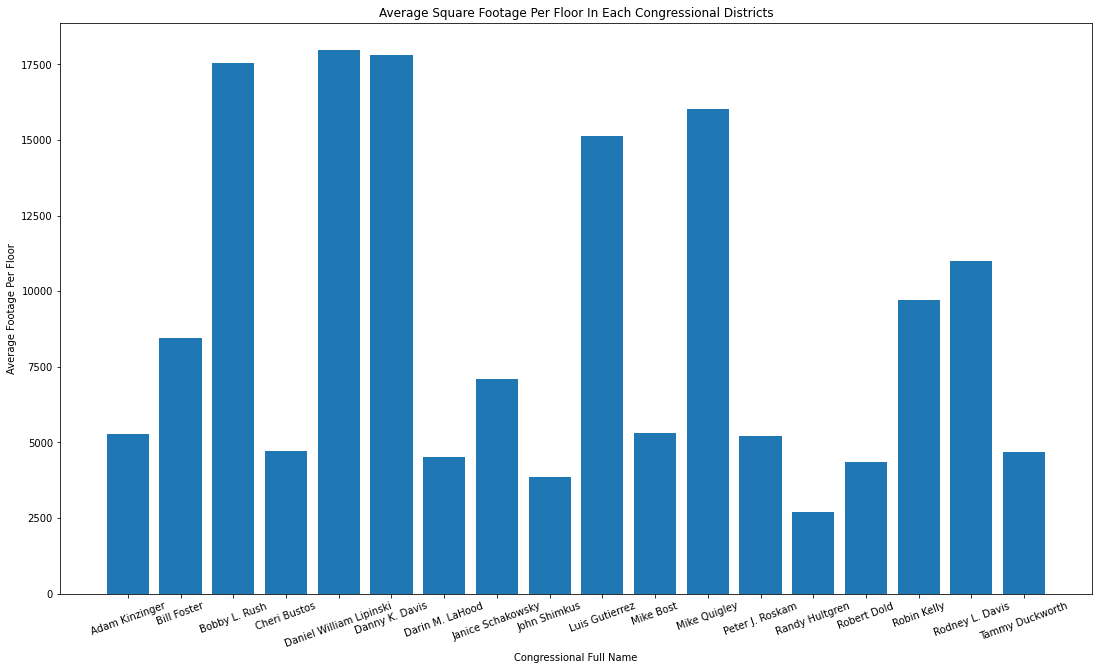

In [4]:

# Average square footage per floor as a function of congressional district


def average_footage_with_congressional_district(df):
    footage_total_floors_cong = df[[
        'Congressional Full Name', 'Square Footage', 'Total Floors']]
    average_foot_per_floor_with_cong = footage_total_floors_cong.groupby(
        'Congressional Full Name', as_index=False).sum()
    average_foot_per_floor_with_cong['Average Footage Per Floor'] = average_foot_per_floor_with_cong['Square Footage'] / \
        average_foot_per_floor_with_cong['Total Floors']
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5, forward=True)
    ax.bar(x=average_foot_per_floor_with_cong['Congressional Full Name'],
           height=average_foot_per_floor_with_cong['Average Footage Per Floor'])
    plt.xticks(rotation=20)
    ax.set_xlabel('Congressional Full Name')
    ax.set_ylabel('Average Footage Per Floor')
    ax.set_title(
        'Average Square Footage Per Floor In Each Congressional Districts')
    # return average_foot_per_floor_with_cong


average_footage_with_congressional_district(df)

## Third Plot

This graph shows the average square footage per floor of each congressional district. I also used a bar plot to visualize it so it can direct show what are the quantatative relationships between each different district. However, the problem is similar with the previous one, which is it is hard to connect geographical ajacient disctricts together to compare in this graph. 


Department of Natural Resources
Department of Corrections
Department of Transportation
Department of Human Services
University of Illinois


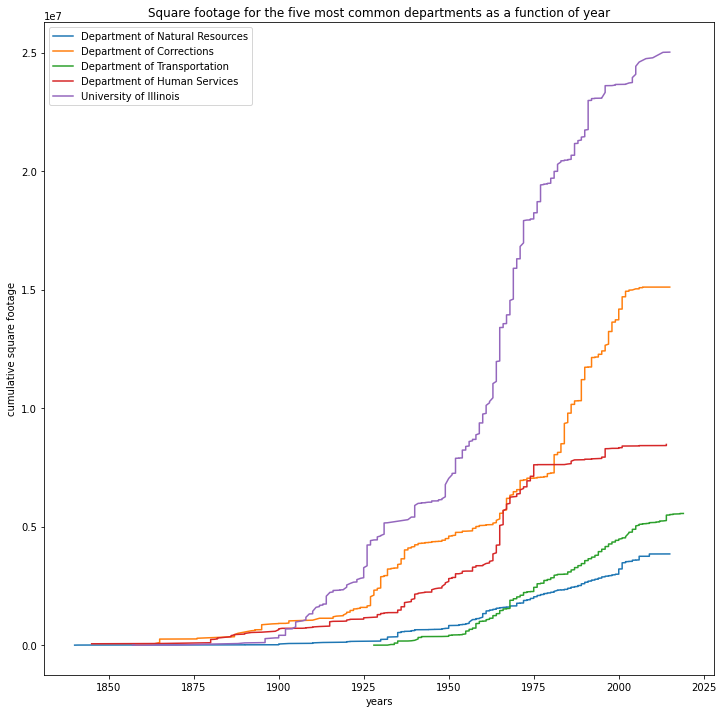

In [5]:

# Square footage for the five most common departments as a function of year:

# 1. get what are the 5 most common departments
# 2. group by year and sum the sizes for each department



def get_five_popular_departments(df):
    return df.groupby(['Agency Name']).count().sort_values(by=['Location Name'], ascending=False)


# square_footage_for_five_most_common_departments_with_year(df).head()

# depart_df = df[df['Agency Name'] == 'Department of Natural Resources'][['Square Footage', 'Year Acquired']].dropna(subset=['Square Footage', 'Year Acquired']).sort_values(by=['Year Acquired'])

# depart_df['Cumulative Footage'] = depart_df['Square Footage'].cumsum()
# ax.plot(depart_df['Year Acquired'], depart_df['Cumulative Footage'])格式化
# ax.plot(depart_natural_resource['Year Acquired'], depart_natural_resource['Cumulative Footage'] + 100000)


def plot_selected_departements(axes, df, departments):
    for department in departments:
        print(department)
        depart_df = df[df['Agency Name'] == department][['Square Footage', 'Year Acquired']].dropna(
            subset=['Square Footage', 'Year Acquired']).sort_values(by=['Year Acquired'])
        depart_df['Cumulative Footage'] = depart_df['Square Footage'].cumsum()
        axes.plot(depart_df['Year Acquired'], depart_df['Cumulative Footage'])
    return axes


def square_footage_for_most_common_departments_with_year(df, how_many=5):

    depart_list = list(get_five_popular_departments(df).head(how_many).index)
    fig, ax = plt.subplots(figsize=(12, 12))
    ax = plot_selected_departements(ax, df, depart_list)
    ax.legend(depart_list)
    ax.set_xlabel('years')
    ax.set_ylabel('cumulative square footage')
    ax.set_title(
        'Square footage for the five most common departments as a function of year')
    return fig, ax


fig, ax = square_footage_for_most_common_departments_with_year(df, 5)


## Fourth Plot

This graph shows five most popular departments as the line where x stands for the year and y stands for the accumulative square footage of each department. The good parts of this plot is it is clear about which department it represents by varing different colors for each line. Also, I wrote the algorithm such that we can determine as many departments as we want in the same graph (just the positional argument in line 122 "how_many"). Some drawbacks of this graph is the accumulative square footage is such a big nunmber that matplotlib automatically transffered the unit to 1e7 on top right corner. This may be somehow not so intuitive to the audience to determine the scale of the quantity here. Also, because the graph is relatively bigger than the other graphs, it can be harder for the audience to draw a straight line of a certain year. I suppose that the new bqplot lib can do that better than matplotlib. 
